In [111]:
include("DiscreteMaps.jl")
using DiscreteMaps, HDF5, JLD, PyPlot, Distributions
path = "results/lrb";

In [103]:
depsv = 1e-6 * [1:9]
Nv = [40000,60000,80000]

NSin = 100
NPhas = 30
NDeps = length(depsv)
NN = length(Nv)
M = 20
rundate="2015-06-30"
maxchisqp = Array(Int64,NSin,NDeps)
medianchv = nans(NSin,NPhas,NDeps,NN)

for dei = 1:NDeps, ni = 1:NN
    deps = depsv[dei]
    N = Nv[ni]
    
    for p = 1:NPhas
        extrastuff = ["-$(deps)-","-$(M)-","-$(N)-",rundate,"-$(round((p-1)/NPhas,3))-"]
        files = DiscreteMaps.searchdirh5(path,"Lh")
        for str in extrastuff
            files = filter(x->contains(x,"$(str)"),files)
        end
          FL = length(files)
     #   (println(FL, " files found"))
        FL == 0 && continue
        chisqvals = Array(Float64,NSin,FL)
        for fi = 1:FL
            L = JLD.load("$(path)/$(files[fi])")
            chisqvals[:,fi] = DiscreteMaps.checklinearresponse(L["epsv"],L["eA"][1:NSin,:],L["vA"][1:NSin,:])[1]
        end
        
        medianchv[:,p,dei,ni] = median(chisqvals,2)
    end
end
JLD.save("results/lrb/medianchv.h5","medianchv",medianchv)

LoadError: interrupt
while loading In[103], in expression starting on line 13

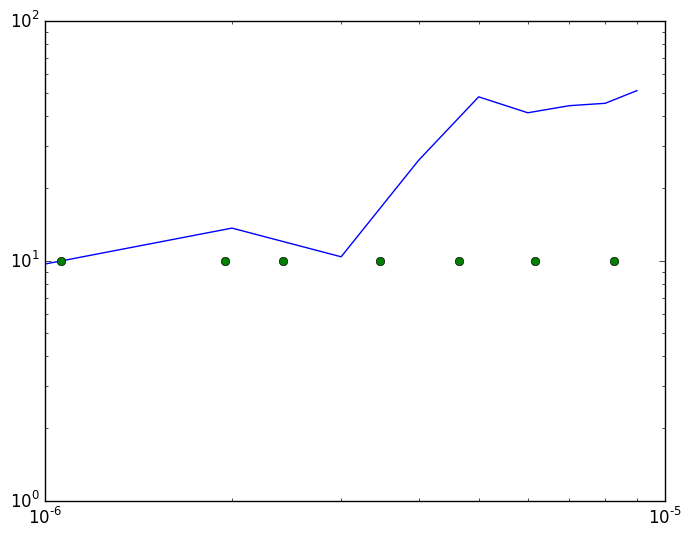

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12583f8d0>

In [277]:
k = 67


plt = loglog(depsv,
depsv.^(0) .* maximum(meanchv[k,:,:,3],2)[:] - (M-2),"-");
hold(true)
#axis([1,10,1,100]);#[0,NSin,1e-16,1]);
#plot([1:NSin],maxchisqp)
epsta = epst/k * 0.5
epsta = epsta[minimum(depsv) .< epsta .< maximum(depsv)]
loglog(epsta,fill(10,size(epsta)),"o");
#loglog(1e-6*[3:10],0.14*[3:10].^4)

In [177]:
include("DiscreteMaps.jl")
using DiscreteMaps, HDF5, JLD, PyPlot, Distributions
path = "results/lrb";
Mp = DiscreteMaps.logistic(3.8)
CO = DiscreteMaps.criticalorbit(Mp)
cpts = CO.pts # c_n
cspds = abs(DiscreteMaps.logisticcospeeds(CO,Mp)) #u_n
kepst = (1/2pi) ./ cspds
kst = kepst / (M * 1e-6);
epst = kepst / M;

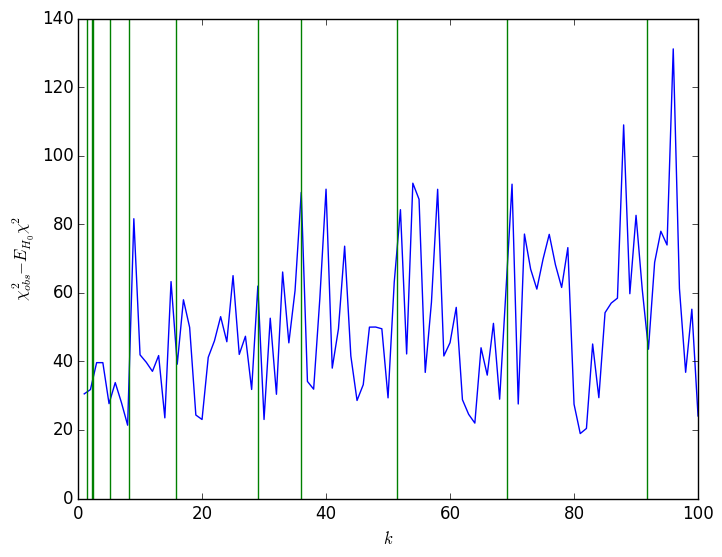

In [269]:
fig = figure()
ksta = kepst/M*1
#println(kepst)
deps = depsv[end]
ksta = ksta[deps .< ksta .< deps*NSin]/deps
plt = plot([1:NSin],([1:NSin]*deps).^(0) .*
(maximum(meanchv[:,:,end,3],2) - (M-2)),"-");
#axis([1,100,1,20])
hold(true)
plot(repmat(ksta,1,2)',(ksta.^(0) .*repmat([0. 140.],length(ksta),1))',"g-")

xlabel("\$k\$")
ylabel("\$\\chi^2_{obs} - E_{H_0}\\chi^2\$")
f = open("chivsk.pdf","w")
PyPlot.writemime(f, "application/pdf", fig) 
close(f)

In [ ]:
ksta = kepst
#println(kepst)
ksta = ksta[minimum(depsv)*1 .< ksta .< maximum(depsv)*NSin]
plot(ksta,fill(10.,size(ksta)),"o")
hold(true)
plt = semilogy([1:NSin]*depsv',
mean(meanchv[:,:,:,3],2)[:,:] - (M-2),"-");
#axis([1,100,1,20])

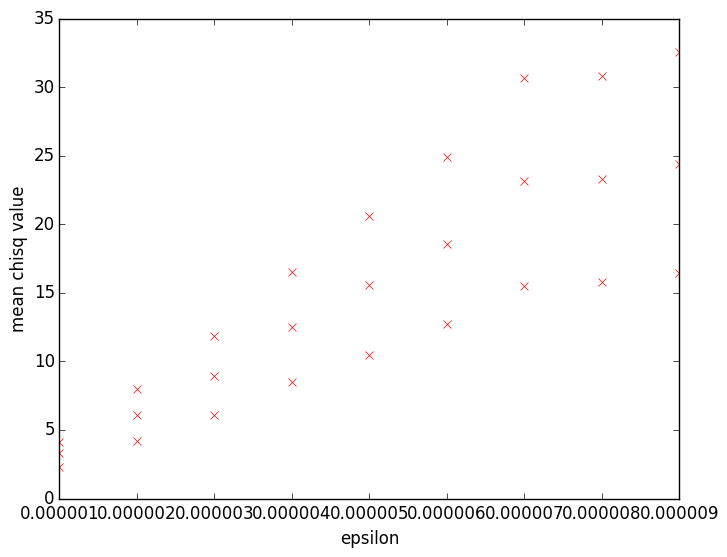

In [273]:
fig = figure()
depsv = 1e-6 * [1:9]

NSin = 100
NPhas = 30
NDeps = length(depsv)
M = 20
N = 80000
rundate="2015-06-30"
#plot( depsv,fill(quantile(Chisq(M-2),[0.05,0.5,0.95]),NDeps),"--")
hold(true)
for dei = [1:NDeps], ni = [1:NN]#, N in [40000,60000,80000]

    # fig = PyPlot.figure()
    # ax = PyPlot.gca()

#    plt = plot(#repmat([1:NSin]',FL,1),pvals',"k.",
#    [1:NSin],quantilev[:,:,2],"b.",
#    [1:NSin],fill(quantile(Chisq(M-2),[0.05,0.5,0.95]),NSin)#repmat(quantiles',NSin,1)
#    ,"--");
    plot(#repmat([1:NSin]',FL,1),pvals',"k.",
  #  [1:NSin]
    depsv[dei],
    #minimum(
    mean(meanchv[:,:,dei,ni])-(M-2)#,2),"-");
    ,"rx");
  #  plot(0.,0.,"rx")

end
hold(false)
#axis([0,NSin,1e-16,1]);
xlabel("epsilon")
ylabel("mean chisq value")
f = open("Nvseps.pdf","w")
PyPlot.writemime(f, "application/pdf", fig) 
close(f)

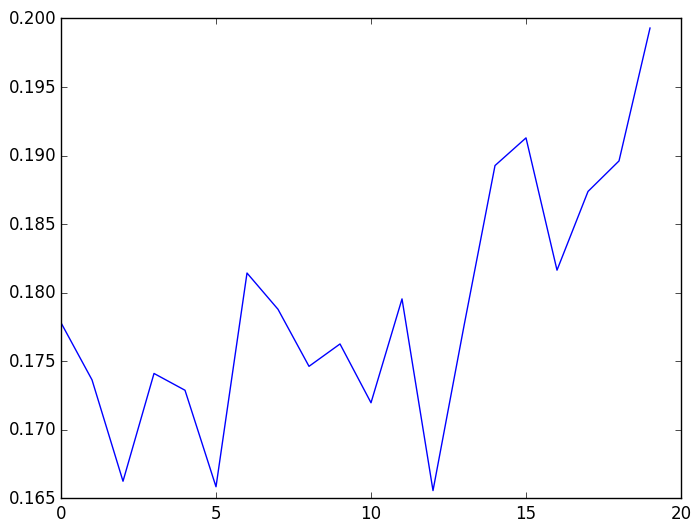

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1112cebd0>

In [30]:
deps = 1e-6
extrastuff = ["-$(deps)-","-$(M)-","-$(N)-",rundate,"-$(round(10/NPhas,3))-"]
        files = DiscreteMaps.searchdirh5(path,"Lh")
        for str in extrastuff
            files = filter(x->contains(x,"$(str)"),files)
        end

ks = 68
va = zeros(size(JLD.load("$(path)/$(files[1])")["eA"][[7],:]'))
for i = 1:5
    L = JLD.load("$(path)/$(files[i])")
    plot(L["eA"][[ks],:]')
    hold(true)
    dmclr = DiscreteMaps.checklinearresponse(L["epsv"],L["eA"][1:NSin,:],L["vA"][1:NSin,:])
    va += L["eA"][[ks],:]' - (dmclr[3][ks] + dmclr[4][ks]*L["epsv"]).*sqrt(L["vA"][ks,:][:])/80000
end
hold(false)
plot(va)
#axis([0,20,-0.05,-0.02]);
#checklinearresponse(L)[3]

In [185]:
deps_crit vs N for A = sin(x). Hope deps_crit ~ N^-3/2
    
    then for deps > deps_c(N), hope take A = sin k(x - x_pt) and hope for --_--

LoadError: syntax: extra token "vs" after end of expression
while loading In[185], in expression starting on line 1

In [201]:
depsv = 1e-6 #1e-6 * [1:9]
Nv = 80000#[40000,60000,80000]

NSin = 100
NPhas = 30
NDeps = length(depsv)
NN = length(Nv)
M = 20
rundate="2015-06-30"
maxchisqp = Array(Int64,NSin,NDeps)
medianchv = nans(NSin,NPhas,NDeps,NN)

for dei = 1:NDeps, ni = 1:NN
    deps = depsv[dei]
    N = Nv[ni]
    
    for p = 1:NPhas
        extrastuff = ["-$(deps)-","-$(M)-","-$(N)-",rundate,"-$(round((p-1)/NPhas,3))-"]
        files = DiscreteMaps.searchdirh5(path,"Lh")
        for str in extrastuff
            files = filter(x->contains(x,"$(str)"),files)
        end
          FL = length(files)
     #   (println(FL, " files found"))
        FL == 0 && continue
        chisqvals = Array(Float64,NSin,FL)
        for fi = 1:FL
            L = JLD.load("$(path)/$(files[fi])")
            chisqvals[:,fi] = DiscreteMaps.checklinearresponse(L["epsv"],L["eA"][1:NSin,:],L["vA"][1:NSin,:])[1]
        end
        
        medianchv[:,p,dei,ni] = median(chisqvals,2)
    end
end
JLD.save("results/lrb/medianchv.h5","medianchv",medianchv)

[0.5129891760425771
 0.2773927772077526
 0.1780134926840083
 0.2591299639225074
 0.14245987945869001
 0.09941190177042715
 0.08680901221424346
 0.0542549155101509
 0.14345987779648195
 0.07769048045232538
 0.05021943571353547
 0.06734188378629848
 0.03726658481243907
 0.02695602168403645
 0.021354181335058432
 0.014562022533437509
 0.013835029183363282
 0.00825868465841375
 0.011477729186155097
 0.0063317524063810525
 0.004501131075675547
 0.0037224207304112117
 0.002427693966583756
 0.0029967716314827854
 0.001674028648310165
 0.0012783267897511356
 0.0009155374338819563
 0.0007426839445294241
 0.0004934445997100272
 0.0005339163875520105
 0.0003054583361922263
 0.0002735183208502456
 0.0001682667567944215
 0.0006324775793625225
 0.00034213001922116216
 0.0002199460239800841
 0.00031335299887704854
 0.0001725308757476124
 0.0001213775413687152
 0.00010336809668929764
 6.57789360276959e-5
 0.00010800559402984843
 5.899911549560125e-5
 3.9819748701275964e-5
 3.961570055840278e-5
 2.3224

50-element Array{Float64,1}:
 0.95    
 0.1805  
 0.562095
 0.935348
 0.229794
 0.672557
 0.836851
 0.518819
 0.948654
 0.185096
 0.573174
 0.929653
 0.248514
 ⋮       
 0.681422
 0.824927
 0.548805
 0.940949
 0.211145
 0.632938
 0.882845
 0.393034
 0.906522
 0.322013
 0.829618
 0.537137